In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

### Importar y analizar el csv con todos los datos de los Airbnb

Dataset obtenido de la página web de Inside Airbnb (http://insideairbnb.com/get-the-data.html)

Filtrar por Madrid y descargar el fichero de "listing.csv" (Actualizado a 17 de Octubre de 2.220)

In [41]:
# Leer el .csv

data = pd.read_csv("listings.csv")

In [42]:
# Hacer un primer visionado

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,50,1,78,2020-09-20,0.60,1,84
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,31,4,33,2018-07-15,0.45,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,60,15,0,NaN,NaN,6,365
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,92,4,10,2020-03-01,0.14,1,88
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.59,1,358


In [63]:
# Los datos nulos que faltan en el dataFrame no son relevantes, por lo que decido dejarlos.

data.isnull().sum()

id                                   0
name                                 3
host_id                              0
host_name                           11
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5585
reviews_per_month                 5585
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20497 entries, 0 to 20496
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20497 non-null  int64  
 1   name                            20494 non-null  object 
 2   host_id                         20497 non-null  int64  
 3   host_name                       20486 non-null  object 
 4   neighbourhood_group             20497 non-null  object 
 5   neighbourhood                   20497 non-null  object 
 6   latitude                        20497 non-null  float64
 7   longitude                       20497 non-null  float64
 8   room_type                       20497 non-null  object 
 9   price                           20497 non-null  int64  
 10  minimum_nights                  20497 non-null  int64  
 11  number_of_reviews               20497 non-null  int64  
 12  last_review                     

In [ ]:
# data["Temp"] = weather.Temp.astype(float)

In [44]:
data["price"].value_counts()

30      644
25      579
40      557
50      544
35      517
       ... 
423       1
295       1
263       1
1350      1
615       1
Name: price, Length: 533, dtype: int64

In [46]:
data["neighbourhood_group"].value_counts()

Centro                   9175
Salamanca                1418
Chamberí                 1270
Arganzuela               1158
Tetuán                    866
Carabanchel               703
Retiro                    682
Ciudad Lineal             677
Puente de Vallecas        635
Latina                    601
Moncloa - Aravaca         590
Chamartín                 577
San Blas - Canillejas     521
Hortaleza                 376
Fuencarral - El Pardo     327
Usera                     285
Villaverde                177
Barajas                   174
Moratalaz                 123
Villa de Vallecas          94
Vicálvaro                  68
Name: neighbourhood_group, dtype: int64

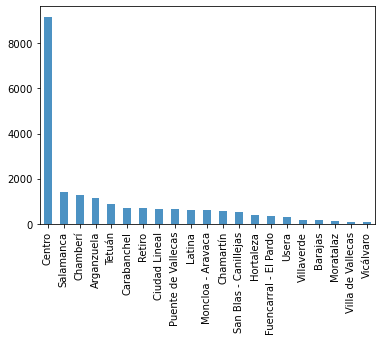

In [108]:
# Podemos ver que el distrito con más airbnbs es el distrito Centro.

data.neighbourhood_group.value_counts().plot(kind="bar", alpha=0.8);

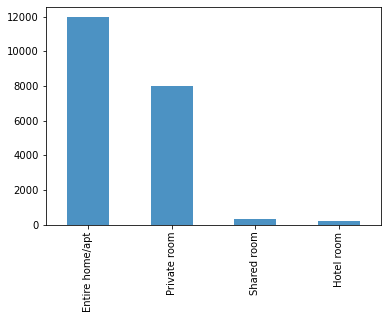

In [109]:
# El mayor tipo de apartamento ofertado se trata del apartamento entero.

data.room_type.value_counts().plot(kind="bar", alpha=0.8);

In [47]:
data["neighbourhood_group"].unique()

array(['Chamartín', 'Latina', 'Arganzuela', 'Centro',
       'Fuencarral - El Pardo', 'Salamanca', 'Puente de Vallecas',
       'Ciudad Lineal', 'Chamberí', 'Villaverde', 'Hortaleza',
       'Moncloa - Aravaca', 'Carabanchel', 'Tetuán', 'Retiro',
       'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas', 'Usera',
       'Moratalaz', 'Vicálvaro'], dtype=object)

In [111]:
# Funciona

# data[data.neighbourhood_group == "Chamartín"]

In [53]:
lst = [barrios.append(barrio) or barrio for barrio in data["neighbourhood_group"].unique()]

lst

['Chamartín',
 'Latina',
 'Arganzuela',
 'Centro',
 'Fuencarral - El Pardo',
 'Salamanca',
 'Puente de Vallecas',
 'Ciudad Lineal',
 'Chamberí',
 'Villaverde',
 'Hortaleza',
 'Moncloa - Aravaca',
 'Carabanchel',
 'Tetuán',
 'Retiro',
 'San Blas - Canillejas',
 'Villa de Vallecas',
 'Barajas',
 'Usera',
 'Moratalaz',
 'Vicálvaro']

In [55]:
len(lst)

21

In [60]:
def busqueda_pisos(distrito):
    
    lst_pisos = data[data.neighbourhood_group == distrito]
    
    return lst_pisos

In [62]:
busqueda_pisos("Usera")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
218,590710,Single/Double private room,2913511,Amparo,Usera,San Fermín,40.36701,-3.68667,Private room,40,7,57,2019-11-25,0.58,2,365
439,1046926,Single room in Madrid - WIFI,2913511,Amparo,Usera,San Fermín,40.36612,-3.68767,Private room,35,7,33,2020-03-31,0.42,2,180
627,1665067,Habitación muy bien comunicada,8814428,Amadeo,Usera,Zofío,40.38406,-3.71282,Private room,25,7,9,2020-10-18,0.13,2,365
1812,7121973,Piso luminoso cerca centro Madrid,37048851,Nayden,Usera,San Fermín,40.36836,-3.69185,Entire home/apt,50,28,7,2019-06-02,0.11,2,0
1834,7186478,Piso Madrid (Usera) 3 habitaciones,37648879,Julia,Usera,Zofío,40.37923,-3.71310,Entire home/apt,25,15,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,45087698,Hab.Individual/Doble/SmartTV/Netflix/WiFi_Desa...,52454284,Alberto,Usera,Almendrales,40.38544,-3.70225,Private room,17,21,3,2020-10-02,2.05,2,342
19874,45101825,Habitacion alquiler,331785718,Emy,Usera,Pradolongo,40.38008,-3.70571,Shared room,350,1,0,NaN,NaN,1,365
19886,45117336,A 7 paradas del centro sol(15 minutos aprox),354132670,Kiara Khaterin,Usera,Orcasur,40.37027,-3.69797,Private room,25,1,0,NaN,NaN,1,365
20086,45416012,Se alquila habitación con baño privado.,33266182,Patricia,Usera,Orcasitas,40.36927,-3.70821,Private room,55,1,0,NaN,NaN,1,179


In [96]:
data["host_id"].value_counts().head(50)

102947901    192
247570318    155
28038703     120
276565844    101
99018982      86
32046323      75
107141654     69
28786243      66
107335103     64
40877988      61
5542111       59
112373304     59
1408525       51
100336740     46
220103569     44
329651519     42
342126256     42
265147782     39
349775778     37
129000409     37
27526991      36
157114944     36
132022481     35
1718458       34
319616632     33
596469        32
4599639       32
112271726     32
9885245       31
14032635      29
215986813     28
39362213      27
113896128     27
44267738      27
23441165      26
189499794     26
48033079      26
199036370     26
34212673      26
307123621     26
349297512     25
189058637     25
106947145     25
102196656     25
69566471      25
105708985     24
77420214      24
258850169     23
139789014     23
4190343       22
Name: host_id, dtype: int64

In [8]:
bici = pd.read_csv("bases_bicimad.csv",encoding= 'unicode_escape')

In [26]:
# Descargo el archivo XLS de la página

# https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=e9b2a4059b4b7410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

In [29]:
# pip install xlrd

In [30]:
madrid = pd.read_excel("estaciones.xlsx")

madrid

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,Longitud,Latitud,Direccion
0,001 a,440443.61,4474290.65,43803,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3701998,404171107,"ALCALA, CALLE, DE, 2, Plazas: 30"
1,001 b,440480.56,4474301.74,43867,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-37015636,404172132,"ALCALA, CALLE, DE, 6, Plazas: 30"
2,002,440134.83,4474678.23,41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-37056739,4042058,"MIGUEL MOYA, CALLE, DE, 1, Plazas: 24"
3,003,440012.98,4475760.68,41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-37072122,404303224,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL, 2, Plaz..."
4,004,440396.40,4475565.36,41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,-37026739,404285905,"MANUELA MALASAÑA, CALLE, DE, 3, Plazas: 24"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,209,441606.43,4479673.82,43738,05 CHAMARTÍN,05-05 NUEVA ESPAÑA,"CASTILLA, PLAZA, DE",9,BiciMAD,24,-36887875,404656872,"CASTILLA, PLAZA, DE, 9, Plazas: 24"
217,210,440392.24,4474584.46,43662,01 CENTRO,01-06 SOL,"TRES CRUCES, CALLE, DE LAS",9,BiciMAD,27,-3702631,404197538,"TRES CRUCES, CALLE, DE LAS, 9, Plazas: 27"
218,211,440400.99,4474680.19,43697,01 CENTRO,01-05 UNIVERSIDAD,"DESENGAÑO, CALLE, DEL",3,BiciMAD,24,-37025369,404206168,"DESENGAÑO, CALLE, DEL, 3, Plazas: 24"
219,212,439193.57,4472197.09,44008,11 CARABANCHEL,11-03 SAN ISIDRO,"MARQUES DE VADILLO, GLORIETA, DEL",9,BiciMAD,24,-37165313,403981605,"MARQUES DE VADILLO, GLORIETA, DEL, 9, Plazas: 24"


In [34]:
madrid["Distrito"].unique()

array(['01 \xa0CENTRO', '07 \xa0CHAMBERÍ', '09 \xa0MONCLOA-ARAVACA',
       '02 \xa0ARGANZUELA', '03 \xa0RETIRO', '04 \xa0SALAMANCA',
       '06 \xa0TETUÁN', '05 \xa0CHAMARTÍN', '13 \xa0PUENTE DE VALLECAS',
       '15 \xa0CIUDAD LINEAL', '11 \xa0CARABANCHEL', '12 \xa0USERA'],
      dtype=object)